# Add title

## Introduction

### Background

GitHub is an online, cloud-based hosting service that manages software projects through key functionalities such as tracking, organizing, sharing, and collaborating (Braga et al., 2023). As the most popular social coding platform, the popularity and quality of the users' repositories serve as strong indicators of their capacity, skills, and experiences. In addition to the number of GitHub users rapidly growing, researchers have performed analyses on the popularity of repositories, ranging from user collaboration based on repository activities to studying the importance of its programming language (Hu et al., 2016). One of the features GitHub offers is the ability to fork a repository which makes a detached copy of it with the original code, allowing users to propose changes or iterate on ideas without interfering with the original's workflow (GitHub). We will be exploring the relationship between the number of forks a repository has with various input variables in this project. 

### Question

**Question**: This project will aim to explore the relationship between the response variable `Forks` and a set of input variables selected through the stepwise regression approach, backward selection. The objective is to identify factors associated with the number of repositories being forked for a GitHub repository.  

### Data:

The data is about GitHub projects with more than 167 stars from other users, indicating the popularity of a repository. It consists of 215029 rows corresponding to the top repositories and 24 attributes such as the name and description, number of forks, watching number, and number of stars. The data was collected using the GitHub Search API, searching for repositories with star counts falling within a specific range. 

The features include:

1. `Name`: GitHub repository name (chr)
2. `Description`: Short text description on purpose or focus of repository (chr)
3. `URL`: Unique URL to GitHub repository (chr)
4. `Created At`: Date and time repository was created on GitHub, in ISO 8601 format (chr)
5. `Updated At`: Date and time of repository's most recent update, in ISO 8601 format (chr)
6. `Homepage`: URL to homepage associated with repository (chr)
7. `Size`: Size of repository in bytes (int)
8. `Stars`: Number of stars repository received from other GitHub users (int)
9. `Forks`: Number of forks repository has from other GitHub users (int)
10. `Issues`: Total number of open issues (int)
11. `Watchers`: Total number of repository "watchers" (int)
12. `Language`: Primary programming language of repository (chr)
13. `License`: Information about software license from a license identifier (chr)
14. `Topics`: List of tags associated with repository (chr)
15. `Has Issues`: Boolean value indicating whether repository has an issue tracker enabled (chr)
16. `Has Projects`: Boolean value indicating whether repository uses GitHub Projects tool (chr)
17. `Has Downloads`: Boolean value indicating whether repository has downloadable files for users (chr)
18. `Has Wiki`: Boolean value indicating whether repository has an associated Wiki page (chr)
19. `Has Pages`: Boolean value indicating whether repository has GitHub Pages enabled (chr)
20. `Has Discussions`: Boolean value indicating whether repository has GitHub Discussions enabled (chr)
21. `Is Fork`: Boolean value indicating whether repository is a fork of another repository (chr)
22. `Is Archived`: Boolean value indicating whether repository is archived (chr)
23. `Is Template`: Boolean value indicating whether repository has a template (chr)
24. `Default Branch`: Name of default branch (chr)

## Methods and Results

### EDA

#### Import libraries and read data

In [1]:
# import and load libraries
library(tidyverse)
library(gridExtra)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(AER)
library(car)
library(leaps)
library(mltools)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked

In [2]:
# read data from github repo
github_url <- "https://github.com/alim0118/stat-301-group-project/raw/main/repositories.csv"
github_data <- read.csv(github_url, header=TRUE)
head(github_data)
nrow(github_data) # dataset size before wrangling: 215029

Name                       
1 freeCodeCamp               
2 free-programming-books     
3 awesome                    
4 996.ICU                    
5 coding-interview-university
6 public-apis                
  Description                                                                             
1 freeCodeCamp.org's open-source codebase and curriculum. Learn to code for free.         
2 :books: Freely available programming books                                              
3 😎 Awesome lists about all kinds of interesting topics                                  
4 Repo for counting stars and contributing. Press F to pay respect to glorious developers.
5 A complete computer science study plan to become a software engineer.                   
6 A collective list of free APIs                                                          
  URL                                                      
1 https://github.com/freeCodeCamp/freeCodeCamp             
2 https://github.com/EbookFoundation/free-programming-books
3 https://github.com/sindresorhus/awesome                  
4 https://github.com/996icu/996.ICU                        
5 https://github.com/jwasham/coding-interview-university   
6 https://github.com/public-apis/public-apis               
  Created.At           Updated.At          
1 2014-12-24T17:49:19Z 2023-09-21T11:32:33Z
2 2013-10-11T06:50:37Z 2023-09-21T11:09:25Z
3 2014-07-11T13:42:37Z 2023-09-21T11:18:22Z
4 2019-03-26T07:31:14Z 2023-09-21T08:09:01Z
5 2016-06-06T02:34:12Z 2023-09-21T10:54:48Z
6 2016-03-20T23:49:42Z 2023-09-21T11:22:06Z
  Homepage                                                  Size   Stars  Forks
1 http://contribute.freecodecamp.org/                       387451 374074 33599
2 https://ebookfoundation.github.io/free-programming-books/  17087 298393 57194
3                                                             1441 269997 26485
4 https://996.icu                                           187799 267901 21497
5                                                            20998 265161 69434
6 http://public-apis.org                                      5088 256615 29254
  Issues ⋯ Has.Issues Has.Projects Has.Downloads Has.Wiki Has.Pages
1   248  ⋯ True       True         True          False    True     
2    46  ⋯ True       False        True          False    True     
3    61  ⋯ True       False        True          False    True     
4 16712  ⋯ False      False        True          False    False    
5    56  ⋯ True       False        True          False    False    
6   191  ⋯ True       False        True          False    False    
  Has.Discussions Is.Fork Is.Archived Is.Template Default.Branch
1 False           False   False       False       main          
2 False           False   False       False       main          
3 False           False   False       False       main          
4 False           False   True        False       master        
5 False           False   False       False       main          
6 False           False   False       False       master

[1] 215029

#### Data Cleaning

We will consider taking a random sample of the data since we are working with a huge dataset regarding the number of observations included. We will continue this analysis by randomly sampling a few thousand out of the 215k observations.

In [3]:
set.seed(2024)
github_sample <- github_data[sample(nrow(github_data), 5000),]
head(github_sample)
dim(github_sample)

Name               
86565  daedalus           
45756  AnalogTapeModel    
177041 bedrock-viz        
19872  rangy              
7802   laravel-activitylog
127999 C-Primer-Plus      
       Description                                                                
86565  The Nintendo 64 Emulator itself                                            
45756  Physical modelling signal processing for analog tape recording             
177041 Minecraft Bedrock Edition World Visualization & Reporting Tool with Web App
19872  A cross-browser JavaScript range and selection library.                    
7802   Log activity inside your Laravel app                                       
127999 C Primer Plus  6th edition exercises answers.                              
       URL                                                 Created.At          
86565  https://github.com/DaedalusX64/daedalus             2019-03-18T04:00:46Z
45756  https://github.com/jatinchowdhury18/AnalogTapeModel 2019-02-06T08:53:47Z
177041 https://github.com/bedrock-viz/bedrock-viz          2019-12-05T14:26:21Z
19872  https://github.com/timdown/rangy                    2014-03-22T21:23:49Z
7802   https://github.com/spatie/laravel-activitylog       2016-06-23T12:17:12Z
127999 https://github.com/zhayujie/C-Primer-Plus           2017-12-04T03:21:50Z
       Updated.At           Homepage                                   Size  
86565  2023-09-24T17:16:56Z                                            762512
45756  2023-09-23T23:44:37Z                                            122733
177041 2023-09-15T16:42:45Z                                              1409
19872  2023-09-23T10:01:14Z                                              9345
7802   2023-09-21T09:59:09Z https://docs.spatie.be/laravel-activitylog   1922
127999 2023-09-25T12:14:24Z https://zhayujie.com                          442
       Stars Forks Issues ⋯ Has.Issues Has.Projects Has.Downloads Has.Wiki
86565   479   50     3    ⋯ True       True         True          True    
45756   941   55    19    ⋯ True       True         True          True    
177041  211   49    60    ⋯ True       True         True          True    
19872  2166  375   175    ⋯ True       True         True          True    
7802   4917  684    14    ⋯ True       False        True          False   
127999  309   79     1    ⋯ True       True         True          True    
       Has.Pages Has.Discussions Is.Fork Is.Archived Is.Template Default.Branch
86565  True      True            False   False       False       master        
45756  False     False           False   False       False       master        
177041 False     True            False   False       False       master        
19872  True      False           False   False       False       master        
7802   False     True            False   False       False       main          
127999 False     False           False   False       False       master

[1] 5000   24

We will also focus on the four most common programming languages: "Python", "JavaScript", "Java", and "C++".

In [4]:
# Include only four main languages
github_sample <- subset(github_sample, Language %in% c("Python", "JavaScript", "Java", "C++"))

We will next check for missing values and duplicated values in the data. We will remove outliers using the IQR method to preserve normality and reduce variability. 

In [5]:
# Check if interested variables has any N/A values
sum(is.na(github_sample$Forks))
sum(is.na(github_sample$Issues))
sum(is.na(github_sample$Language))

[1] 0

[1] 0

[1] 0

In [6]:
# Check if there are any duplicated value
sum(duplicated(github_sample))

[1] 0

We observe no missing values nor duplicated values.

In [7]:
variables <- github_sample %>% select(Forks,Stars,Issues)
Summary <- summary(variables)
Summary

     Forks              Stars             Issues       
 Min.   :    0.00   Min.   :  167.0   Min.   :   0.00  
 1st Qu.:   46.75   1st Qu.:  230.8   1st Qu.:   4.00  
 Median :   89.00   Median :  368.5   Median :  12.00  
 Mean   :  232.57   Mean   : 1110.8   Mean   :  41.02  
 3rd Qu.:  202.00   3rd Qu.:  808.5   3rd Qu.:  32.00  
 Max.   :15396.00   Max.   :60715.0   Max.   :3042.00  

In [8]:
# Excluding the outliers
github_sample <- github_sample %>%
                 filter(Forks <= 250 & Stars <= 1000 & Issues <= 60)

In [9]:
head(github_sample)

Name             
1 daedalus         
2 AnalogTapeModel  
3 bedrock-viz      
4 Lilex            
5 react-transitions
6 react-ive-meteor 
  Description                                                                                                                             
1 The Nintendo 64 Emulator itself                                                                                                         
2 Physical modelling signal processing for analog tape recording                                                                          
3 Minecraft Bedrock Edition World Visualization & Reporting Tool with Web App                                                             
4 🤘Open source programming font                                                                                                          
5 Many single page web applications don't use transitions for their different routes. This React Transitions library hopes to change that.
6 Demo app of React and Meteor using a social feed                                                                                        
  URL                                                 Created.At          
1 https://github.com/DaedalusX64/daedalus             2019-03-18T04:00:46Z
2 https://github.com/jatinchowdhury18/AnalogTapeModel 2019-02-06T08:53:47Z
3 https://github.com/bedrock-viz/bedrock-viz          2019-12-05T14:26:21Z
4 https://github.com/mishamyrt/Lilex                  2019-10-09T20:05:17Z
5 https://github.com/joerez/react-transitions         2018-10-26T20:55:33Z
6 https://github.com/AdamBrodzinski/react-ive-meteor  2015-06-12T21:51:44Z
  Updated.At           Homepage                                             
1 2023-09-24T17:16:56Z                                                      
2 2023-09-23T23:44:37Z                                                      
3 2023-09-15T16:42:45Z                                                      
4 2023-09-24T02:41:52Z                                                      
5 2023-06-17T17:23:43Z http://www.joerezendes.com/projects/react-transitions
6 2023-06-12T22:10:48Z                                                      
  Size   Stars Forks Issues ⋯ Has.Issues Has.Projects Has.Downloads Has.Wiki
1 762512 479   50     3     ⋯ True       True         True          True    
2 122733 941   55    19     ⋯ True       True         True          True    
3   1409 211   49    60     ⋯ True       True         True          True    
4   1928 489    7     7     ⋯ True       True         True          True    
5   1549 216    7     9     ⋯ True       True         True          True    
6    137 245   32     4     ⋯ True       True         True          True    
  Has.Pages Has.Discussions Is.Fork Is.Archived Is.Template Default.Branch
1 True      True            False   False       False       master        
2 False     False           False   False       False       master        
3 False     True            False   False       False       master        
4 True      False           False   False       False       master        
5 False     False           False   False       False       master        
6 False     False           False   False       False       master

We will focus on the relevant variables for this regression analysis with `Stars`, `Issues`, and `Language` as the explanatory variables and `Forks` as the response variable of this dataset. We will consider `Language` as a categorical variable.

In [10]:
github_cleaned <- github_sample %>%
    select(Language,Stars,Issues,Forks) 
head(github_cleaned)

Language   Stars Issues Forks
1 C++        479    3     50   
2 C++        941   19     55   
3 C++        211   60     49   
4 Python     489    7      7   
5 JavaScript 216    9      7   
6 JavaScript 245    4     32

First, we will interpret our continuous variables.

In [11]:
github_cont <- github_cleaned %>% select(Stars, Issues)
head(github_cont)

Stars Issues
1 479    3    
2 941   19    
3 211   60    
4 489    7    
5 216    9    
6 245    4

In [12]:
summary_cont <- summary(github_cont)
summary_cont

     Stars           Issues     
 Min.   :167.0   Min.   : 0.00  
 1st Qu.:210.0   1st Qu.: 3.00  
 Median :281.0   Median : 8.00  
 Mean   :351.8   Mean   :12.33  
 3rd Qu.:435.0   3rd Qu.:18.00  
 Max.   :992.0   Max.   :60.00  

In [13]:
Forks_mean <- github_cleaned %>%
group_by(Language) %>%
summarise(Forks = mean(as.numeric(Forks)), .groups = 'drop')
Forks_mean

Language   Forks   
1 C++        74.82456
2 Java       92.75304
3 JavaScript 67.24792
4 Python     77.90706

*Table 1: Mean Number of Forks for each Language*

#### Visualization

We will explore the correlationship between continuous variables in our dataset.

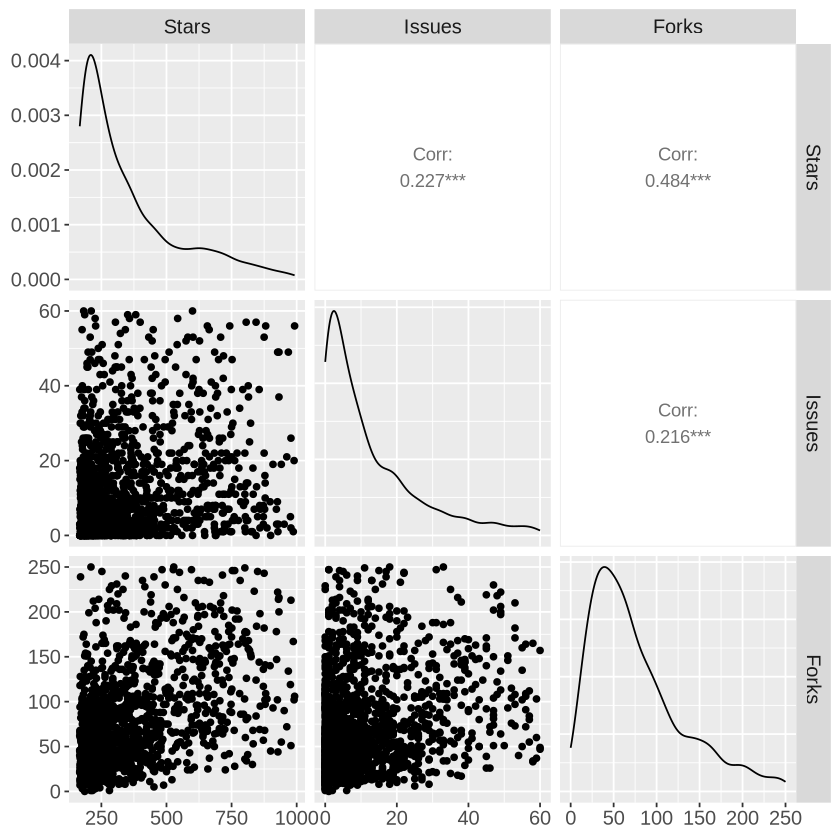

In [14]:
github_pair_plots <- github_cleaned %>%
   select(- Language) %>% 
   ggpairs(progress = FALSE) +
   theme(
     text = element_text(size = 15),
     plot.title = element_text(face = "bold"),
     axis.title = element_text(face = "bold")
   )
github_pair_plots

*Figure 1: Pairwise scatterplot of continuous variables*

In [15]:
corr_matrix_github <- github_cleaned %>%
   select(- Language) %>% 
   cor() %>%
   as.data.frame() %>%
   rownames_to_column("var1") %>%
   pivot_longer(-var1, names_to = "var2", values_to = "corr")
 corr_matrix_github

var1   var2   corr     
1 Stars  Stars  1.0000000
2 Stars  Issues 0.2271055
3 Stars  Forks  0.4843271
4 Issues Stars  0.2271055
5 Issues Issues 1.0000000
6 Issues Forks  0.2163748
7 Forks  Stars  0.4843271
8 Forks  Issues 0.2163748
9 Forks  Forks  1.0000000

*Table 2: Correlation chart between continuous variable*

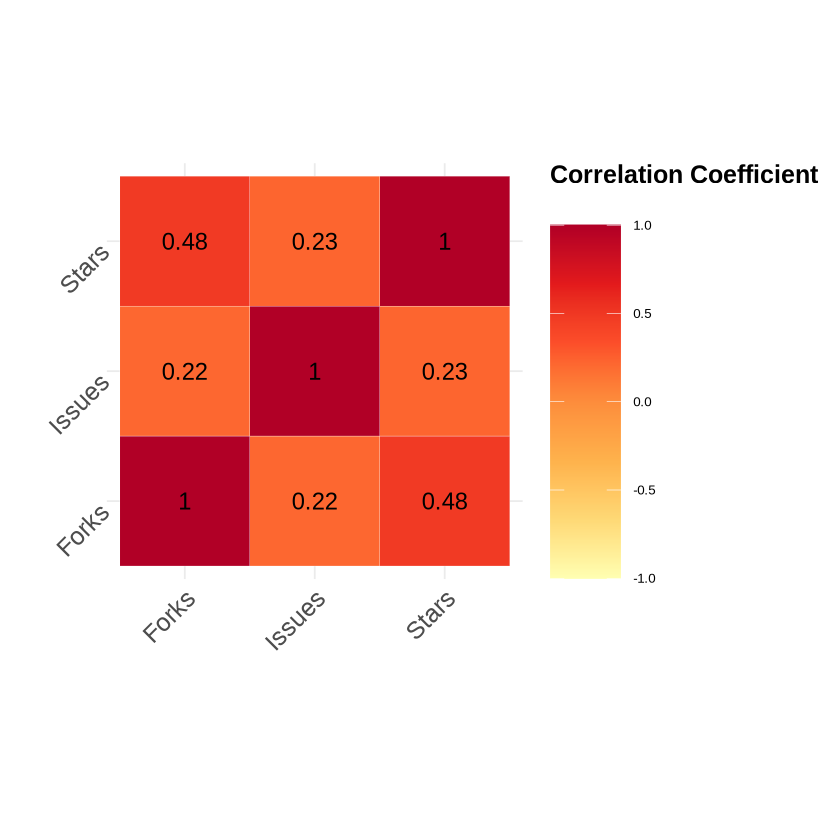

In [29]:
plot_corr_matrix_github <- corr_matrix_github %>%
  ggplot(aes(var1, var2, fill = corr)) +
  geom_tile(color = "white") +
  scale_fill_distiller("Correlation Coefficient \n", palette = "YlOrRd", direction = 1, limits = c(-1, 1)) +
  labs(x = "", y = "") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, vjust = 1, hjust=1, size = 15),
    axis.text.y = element_text(angle = 45, vjust = 1, hjust=1, size = 15),
    legend.title = element_text(size = 15, face = "bold"),
    legend.key.size = unit(1.5, "cm"), 
    legend.text = element_text(size = 8) 
  ) +
  coord_fixed() +
  geom_text(aes(label = round(corr, 2)), color = "black", size = 5) 

# Display the heat map
plot_corr_matrix_github

*Figure 2. Heatmap of correlation matrix for continuous variables*

In [32]:
# Calculate variance inflation factor (VIF) for our continuous input variables to quantify multicollinearity
github_cleaned_cont = github_cleaned %>%
   select(- Language)

MLR_repositories <- lm(formula = Forks ~ ., data = github_cleaned_cont)
VIF_github <- vif(MLR_repositories)
round(VIF_github, 3)

Stars Issues 
 1.054  1.054

None of our continuous input variables are highly correlated, and their variance inflation factor is quite low. Therefore, we shouldn't run into issues with multicollinearity. 

Next, we will explore the continuous variables, `Stars` and `Issues` related to the number of Forks across different programming languages.

In [17]:
boxplot1<- ggplot(github_cleaned, aes(x=Language, y=Forks, fill=Language)) +
  geom_boxplot() +
  xlab("Programming Language") +
  ylab("Number of Forks") +
  ggtitle("Boxplot of Forks by Programming Language") +
  theme_minimal()

boxplot2  <- github_cleaned %>%
ggplot(aes(x = Stars, y = Forks, fill = Language)) + 
geom_boxplot() +
xlab("Stars") + 
ylab("Forks") + 
ggtitle("Relationship Between Stars and Forks by Language") +
  theme_minimal()

boxplot3  <- github_cleaned %>%
ggplot(aes(x = Issues, y = Forks, fill = Language)) + 
geom_boxplot() +
xlab("Issues") + 
ylab("Forks") + 
ggtitle("Relationship Between Issues and Forks by Language") +
  theme_minimal()

In [18]:
Scatterplot1<-ggplot(github_cleaned, aes(x=Stars, y=Forks, color=Language)) +
  geom_point() +
  facet_wrap(~ Language) +
  labs(title="Stars vs. Forks by Programming Language", x="Stars", y="Forks") +
  theme_minimal()



Scatterplot2<-ggplot(github_cleaned, aes(x=Issues, y=Forks, color=Language)) +
  geom_point() +
  facet_wrap(~ Language) +
  labs(title="Issues vs. Forks by Programming Language", x="Issues", y="Forks") +
  theme_minimal()

In [19]:
bar_chart1 = ggplot(github_cleaned, aes(x = Stars, y = Forks, fill = Language)) +
  geom_bar(stat = "identity",width = 20) + 
  facet_wrap(~ Language) +
  ggtitle("Stars vs Forks for each Language") + 
  labs(x = "Stars", y = "Forks", fill = "Language") +
   scale_fill_brewer(palette = "Set2") + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


bar_chart2 = ggplot(github_cleaned, aes(x = Issues, y = Forks, fill = Language)) +
  geom_bar(stat = "identity",width = 1) + 
  facet_wrap(~ Language) +
  ggtitle("Issues vs Forks for each Language") + 
  labs(x = "Issues", y = "Forks", fill = "Language") +
   scale_fill_brewer(palette = "Set1") + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

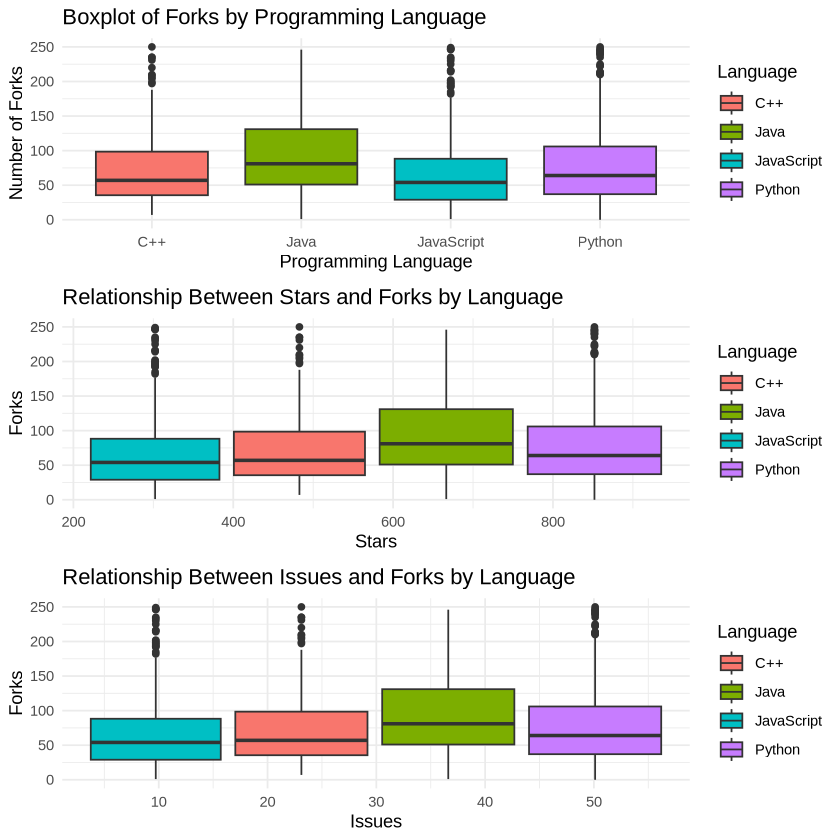

Warning message:
“`position_stack()` requires non-overlapping x intervals”
Warning message:
“`position_stack()` requires non-overlapping x intervals”
Warning message:
“`position_stack()` requires non-overlapping x intervals”
Warning message:
“`position_stack()` requires non-overlapping x intervals”


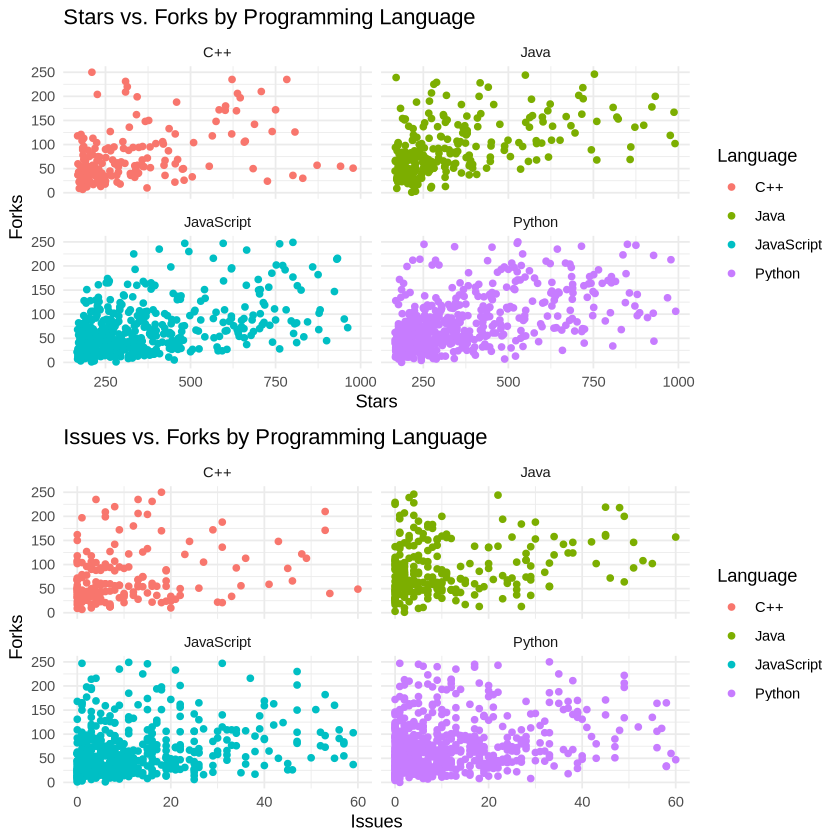

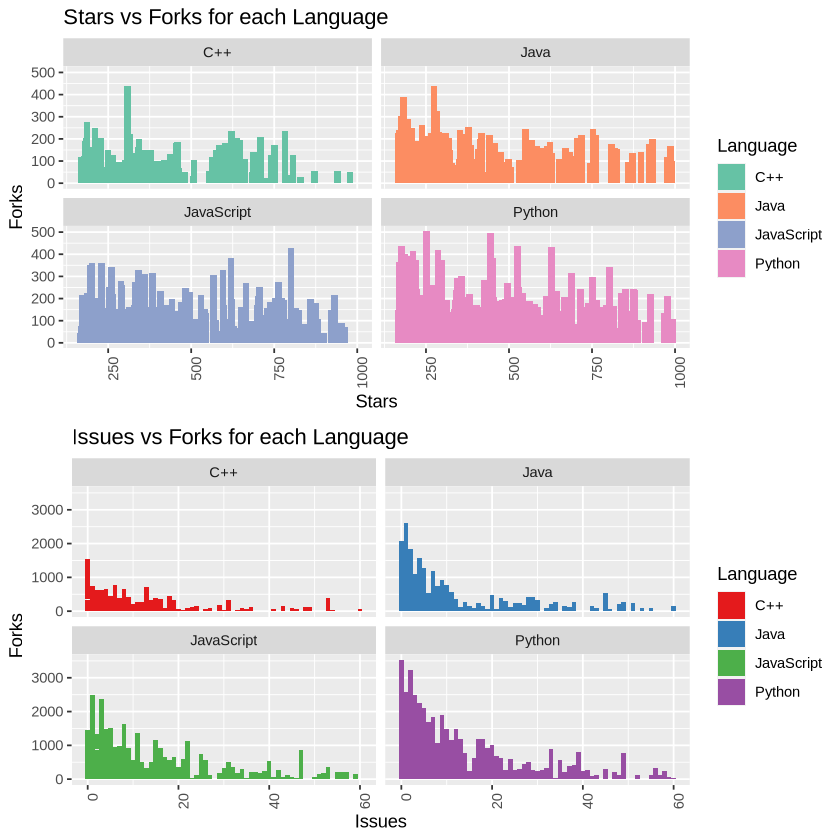

In [20]:
grid.arrange(boxplot1,boxplot2,boxplot3)
grid.arrange(Scatterplot1,Scatterplot2)
grid.arrange(bar_chart1,bar_chart2)

*Figure 3. Multiple plots exploring the relationship between the response variable and both categorical and continuous explanatory variables*

**Boxplot**

* First boxplot allows us to compare the distribution of a number of 'Forks' across different programming languages. By examining the spread of the boxes, we can assess the variability in a number of 'Forks' within each language. Additionally, comparing the medians between languages allows us to identify any significant differences in the distribution of 'Fork' counts across programming languages on GitHub.

* Second boxplot represents the distribution of fork counts for repositories within different programming languages, grouped by their number of stars. Each boxplot provides insight into how the number of forks varies across repositories by the number of stars within each language.

* Third boxplot depicts boxplots representing the distribution of fork counts for repositories within different programming languages, but grouped by the number of issues. Each boxplot reveals how the number of forks varies across repositories by different numbers of issues within each language.

**Scatterplot**
* First scatterplot visualizes the relationship between the number of stars and the number of forks for repositories across various programming languages.  The plot allows us to observe whether there's a correlation between the popularity of a repository and the forking activity.

* Second scatterplot illustrates the relationship between the number of issues and the number of forks for repositories across programming languages. The plot enables us to explore whether there's any association between the issue activity and forking activity across different repositories within each programming language.

**Bar Chart**
* First bar chart illustrates the relationship between the number of stars and the number of forks for repositories within different programming languages.

* Second bar chart demonstrates the relationship between the number of issues and forks for repositories within different programming languages.

## Methods: Plan

### Multiple Linear Regression Analysis with Backward Selection

We'll be using multiple linear regression to examine the relationship between the explanatory variables—`Stars`, `Issues`, and `Language`—and the response variable, `Forks`, in this dataset. We'll also be using backward selection to select the input variables for our generative model. This approach is well-suited for the analysis as it allows for the simultaneous assessment of the impact of multiple predictors on the response variable while systematically eliminating less relevant variables to obtain a more accurate model. 

First, in our data, we'll only select features that are relevant to our question.

In [39]:
github_method <- github_data %>%
select(-Name, -Description, -URL, -Created.At, -Updated.At, -Homepage, -License, -Topics, -Default.Branch)
head(github_method)

Size   Stars  Forks Issues Watchers Language   Has.Issues Has.Projects
1 387451 374074 33599   248  374074   TypeScript True       True        
2  17087 298393 57194    46  298393              True       False       
3   1441 269997 26485    61  269997              True       False       
4 187799 267901 21497 16712  267901              False      False       
5  20998 265161 69434    56  265161              True       False       
6   5088 256615 29254   191  256615   Python     True       False       
  Has.Downloads Has.Wiki Has.Pages Has.Discussions Is.Fork Is.Archived
1 True          False    True      False           False   False      
2 True          False    True      False           False   False      
3 True          False    True      False           False   False      
4 True          False    False     False           False   True       
5 True          False    False     False           False   False      
6 True          False    False     False           False   False      
  Is.Template
1 False      
2 False      
3 False      
4 False      
5 False      
6 False

In [40]:
# Convert Language into Dummy variable
github_method <- github_method %>%
  mutate_at(vars(Language), as.factor) %>%
  mutate(dummy_language = as.numeric(Language) - 1)

Next, we cannot use the same data we use to select our variables with to also make inferences, or else we'll run into the post-inference problem and invalidate our inference results. To fix this, we'll split our data into a selection and training set, where backward selection will be run on the selection set and our model will be built on the training set. 

In [45]:
# Split data in 70-30 basis, 70% to training and 30% to selection
set.seed(2024)  

training_data <- sample_n(github_method, size = nrow(github_method) * 0.70, replace = FALSE)

selection_data <- anti_join(github_method, training_data)

#Remove Language
training_data <- subset(training_data, select = -Language)
selection_data <- subset(selection_data, select = -Language)

head(training_data)
head(selection_data)



Joining with `by = join_by(Size, Stars, Forks, Issues, Watchers, Language,
Has.Issues, Has.Projects, Has.Downloads, Has.Wiki, Has.Pages, Has.Discussions,
Is.Fork, Is.Archived, Is.Template, dummy_language)`


Size   Stars Forks Issues Watchers Has.Issues Has.Projects Has.Downloads
1 762512  479   50     3     479     True       True         True         
2 122733  941   55    19     941     True       True         True         
3   1409  211   49    60     211     True       True         True         
4   9345 2166  375   175    2166     True       True         True         
5   1922 4917  684    14    4917     True       False        True         
6    442  309   79     1     309     True       True         True         
  Has.Wiki Has.Pages Has.Discussions Is.Fork Is.Archived Is.Template
1 True     True      True            False   False       False      
2 True     False     False           False   False       False      
3 True     False     True            False   False       False      
4 True     True      False           False   False       False      
5 False    False     True            False   False       False      
6 True     False     False           False   False       False      
  dummy_language
1  45           
2  45           
3  45           
4 147           
5 236           
6  43

Size   Stars  Forks Issues Watchers Has.Issues Has.Projects Has.Downloads
1 387451 374074 33599 248    374074   True       True         True         
2  17087 298393 57194  46    298393   True       False        True         
3   1441 269997 26485  61    269997   True       False        True         
4   5088 256615 29254 191    256615   True       False        True         
5  11187 229569 40474 393    229569   True       True         True         
6    974 217627 21159 282    217627   True       False        True         
  Has.Wiki Has.Pages Has.Discussions Is.Fork Is.Archived Is.Template
1 False    True      False           False   False       False      
2 False    True      False           False   False       False      
3 False    True      False           False   False       False      
4 False    False     False           False   False       False      
5 True     False     False           False   False       False      
6 False    False     False           False   False       False      
  dummy_language
1 333           
2   0           
3   0           
4 256           
5 256           
6   0

In [46]:
# Convert true/false variables to numeric
training_data <- training_data %>%
  mutate(
    Has.Issues = as.numeric(Has.Issues == "True"),
    Has.Projects = as.numeric(Has.Projects == "True"),
    Has.Downloads = as.numeric(Has.Downloads == "True"),
    Has.Wiki = as.numeric(Has.Wiki == "True"),
    Has.Pages = as.numeric(Has.Pages == "True"),
    Has.Discussions = as.numeric(Has.Discussions == "True"),
    Is.Fork = as.numeric(Is.Fork == "True"),
    Is.Archived = as.numeric(Is.Archived == "True"),
    Is.Template = as.numeric(Is.Template == "True")
  )

# Convert true/false variables to numeric
selection_data <- selection_data %>%
  mutate(
    Has.Issues = as.numeric(Has.Issues == "True"),
    Has.Projects = as.numeric(Has.Projects == "True"),
    Has.Downloads = as.numeric(Has.Downloads == "True"),
    Has.Wiki = as.numeric(Has.Wiki == "True"),
    Has.Pages = as.numeric(Has.Pages == "True"),
    Has.Discussions = as.numeric(Has.Discussions == "True"),
    Is.Fork = as.numeric(Is.Fork == "True"),
    Is.Archived = as.numeric(Is.Archived == "True"),
    Is.Template = as.numeric(Is.Template == "True")
  )

Now, we'll run the backward selection algorithm on our selection data. 

In [48]:
#backward selection with selection_data
backward_select <- regsubsets(
  x = Forks ~ ., 
  nvmax = 11,
  data = selection_data,  
  method = "backward"  
)

backward_sum_select <- summary(backward_select)

bwd_summary_df_select <- data.frame(
  n_input_variables = 1:12,  
  RSQ = backward_sum_select$rsq,
  RSS = backward_sum_select$rss,
  ADJ.R2 = backward_sum_select$adjr2
)

backward_sum_select
bwd_summary_df_select

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“2  linear dependencies found”


Reordering variables and trying again:


Subset selection object
Call: regsubsets.formula(x = Forks ~ ., nvmax = 11, data = selection_data, 
    method = "backward")
14 Variables  (and intercept)
                Forced in Forced out
Size                FALSE      FALSE
Stars               FALSE      FALSE
Issues              FALSE      FALSE
Has.Issues          FALSE      FALSE
Has.Projects        FALSE      FALSE
Has.Downloads       FALSE      FALSE
Has.Wiki            FALSE      FALSE
Has.Pages           FALSE      FALSE
Has.Discussions     FALSE      FALSE
Is.Archived         FALSE      FALSE
Is.Template         FALSE      FALSE
dummy_language      FALSE      FALSE
Watchers            FALSE      FALSE
Is.Fork             FALSE      FALSE
1 subsets of each size up to 12
Selection Algorithm: backward
          Size Stars Issues Watchers Has.Issues Has.Projects Has.Downloads
1  ( 1 )  " "  "*"   " "    " "      " "        " "          " "          
2  ( 1 )  " "  "*"   "*"    " "      " "        " "          " "          
3  

n_input_variables RSQ       RSS         ADJ.R2   
1   1                0.4487331 37434231290 0.4487245
2   2                0.4627803 36480344640 0.4627636
3   3                0.4633482 36441781757 0.4633232
4   4                0.4638287 36409152420 0.4637954
5   5                0.4641145 36389742941 0.4640730
6   6                0.4643293 36375156134 0.4642795
7   7                0.4644842 36364635191 0.4644261
8   8                0.4646093 36356146304 0.4645428
9   9                0.4646785 36351444859 0.4646038
10 10                0.4646911 36350590546 0.4646081
11 11                0.4647040 36349715315 0.4646127
12 12                0.4647047 36349665921 0.4646051

*Table 3: Goodness-of-fit statistics from backward selection*

Now that we have the results from our backward selection algorithm, we'll select the model with the highest adj-$R^2$ as our best generative model. Looking on Table 3, a model with 11 input variables seems to be best. The input variables select by this model are `Size`, `Stars`, `Issues`, `Has.Issues`, `Has.Projects`, `Has.Downloads`, `Has.Wiki`, `Has.Discussions`, `Is.Archived`, `Is.Template`, and `dummy_language`.

Now, we can build our model on the training data.

In [49]:
#mlr model
mlr_model_train <- lm(Forks ~ Size + Stars + Issues + dummy_language + Has.Issues + Has.Discussions + Has.Projects + Has.Downloads + Has.Wiki + Is.Archived + Is.Template, 
                      data = training_data)
summary(mlr_model_train)


Call:
lm(formula = Forks ~ Size + Stars + Issues + dummy_language + 
    Has.Issues + Has.Discussions + Has.Projects + Has.Downloads + 
    Has.Wiki + Is.Archived + Is.Template, data = training_data)

Residuals:
   Min     1Q Median     3Q    Max 
-42910    -60    -16     39 241323 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.512e+02  3.261e+01   4.635 3.57e-06 ***
Size             1.369e-05  3.955e-06   3.461 0.000538 ***
Stars            1.828e-01  7.665e-04 238.501  < 2e-16 ***
Issues           9.138e-01  1.468e-02  62.235  < 2e-16 ***
dummy_language  -1.342e-01  2.787e-02  -4.815 1.48e-06 ***
Has.Issues      -1.711e+02  1.649e+01 -10.377  < 2e-16 ***
Has.Discussions -1.121e+02  8.643e+00 -12.973  < 2e-16 ***
Has.Projects     3.283e+01  1.026e+01   3.201 0.001368 ** 
Has.Downloads   -4.986e-01  2.931e+01  -0.017 0.986427    
Has.Wiki         2.340e+01  8.727e+00   2.681 0.007336 ** 
Is.Archived      5.828e+00  1.134e+01   0.514 0.607

In [50]:
#Visualization, tidy table
tidy_mlr_train <- tidy(mlr_model_train)

tidy_mlr_train

term            estimate      std.error    statistic    p.value     
1  (Intercept)      1.511626e+02 3.261170e+01   4.63522715 3.568442e-06
2  Size             1.368963e-05 3.955146e-06   3.46122042 5.378814e-04
3  Stars            1.828162e-01 7.665222e-04 238.50080697 0.000000e+00
4  Issues           9.138137e-01 1.468320e-02  62.23531881 0.000000e+00
5  dummy_language  -1.341781e-01 2.786870e-02  -4.81465184 1.475996e-06
6  Has.Issues      -1.711106e+02 1.649002e+01 -10.37661629 3.230774e-25
7  Has.Discussions -1.121270e+02 8.643372e+00 -12.97260183 1.835123e-38
8  Has.Projects     3.283479e+01 1.025632e+01   3.20142024 1.367803e-03
9  Has.Downloads   -4.986411e-01 2.931074e+01  -0.01701223 9.864269e-01
10 Has.Wiki         2.339931e+01 8.727044e+00   2.68124085 7.335770e-03
11 Is.Archived      5.828438e+00 1.134185e+01   0.51388790 6.073311e-01
12 Is.Template      1.800322e+02 3.495900e+01   5.14980856 2.610799e-07

*Table 4: MLR results on training data with variables selected from best backward selection model*

Finally, we'll use glance to evaluate our model.

In [51]:
glance(mlr_model_train)

r.squared adj.r.squared sigma    statistic p.value df logLik   AIC    
1 0.3347042 0.3346555     1080.885 6883.562  0       11 -1265035 2530097
  BIC     deviance     df.residual nobs  
1 2530226 175840254714 150508      150520

## Discussion

## References

Braga, P. H. P., Hébert, K., Hudgins, E. J., Scott, E. R., Edwards, B. P., Sánchez‐Reyes, L. L., Grainger, M., Foroughirad, V., Hillemann, F., Binley, A. D., Brookson, C. B., Gaynor, K. M., Sabet, S. S., Güncan, A., Weierbach, H., Gomes, D. G., & Crystal‐Ornelas, R. (2023). Not just for programmers: How GitHub can accelerate collaborative and reproducible research in ecology and evolution. Methods in Ecology and Evolution, 14(6), 1364–1380. https://doi.org/10.1111/2041-210x.14108

GitHub. (n.d.). Fork a repository. GitHub . https://docs.github.com/en/pull-requests/collaborating-with-pull-requests/working-with-forks/fork-a-repo#about-forks 

Hu, Y., Zhang, J., Bai, X., Yu, S., & Yang, Z. (2016). Influence analysis of Github repositories. SpringerPlus, 5(1). https://doi.org/10.1186/s40064-016-2897-7

Most popular GitHub repositories (Projects). (2023, October 1). Kaggle. https://www.kaggle.com/datasets/donbarbos/github-repos/data